In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [2]:
adata = sc.read_h5ad('results/pseudobulk.h5ad')

In [3]:
sc.pp.scale(adata)
sc.pp.pca(adata)

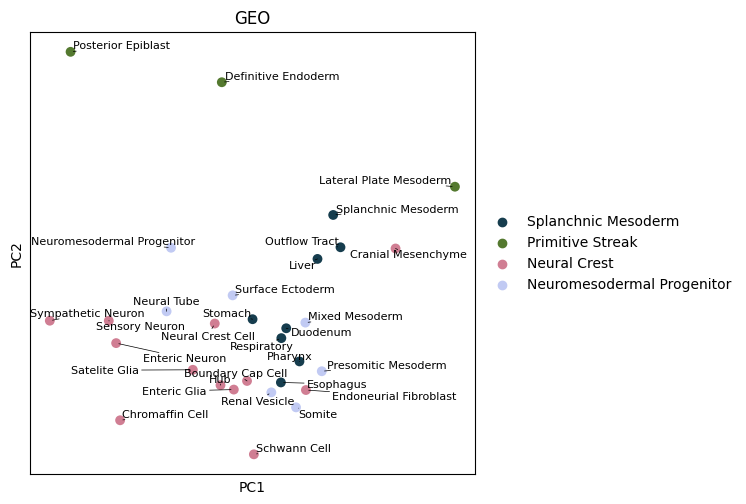

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (5.75, 5.75))
sc.pl.pca(adata, color = 'GEO', size = 200, ax = ax, show = False)

labels = [None] * adata.shape[0]
for i, ix in enumerate(adata.obs_names):
    labels[i] = ax.text(*adata.obsm['X_pca'][i, :2], ix, fontsize = 8, ha = 'center', va = 'center')
adjust_text(labels, arrowprops = {'arrowstyle' : '-', 'color' : 'k', 'lw' : .5})

dset_labels = {
    'GSE136689' : 'Splanchnic Mesoderm',
    'GSE162534' : 'Primitive Streak',
    'GSE201257' : 'Neural Crest',
    'GSE229103' : 'Neuromesodermal Progenitor'
    }

handles, labels = ax.get_legend_handles_labels()
labels = [dset_labels.get(label, label) for label in labels]
ax.legend(handles, labels, loc = 'center left', bbox_to_anchor = (1, .5), frameon = False)

plt.show()

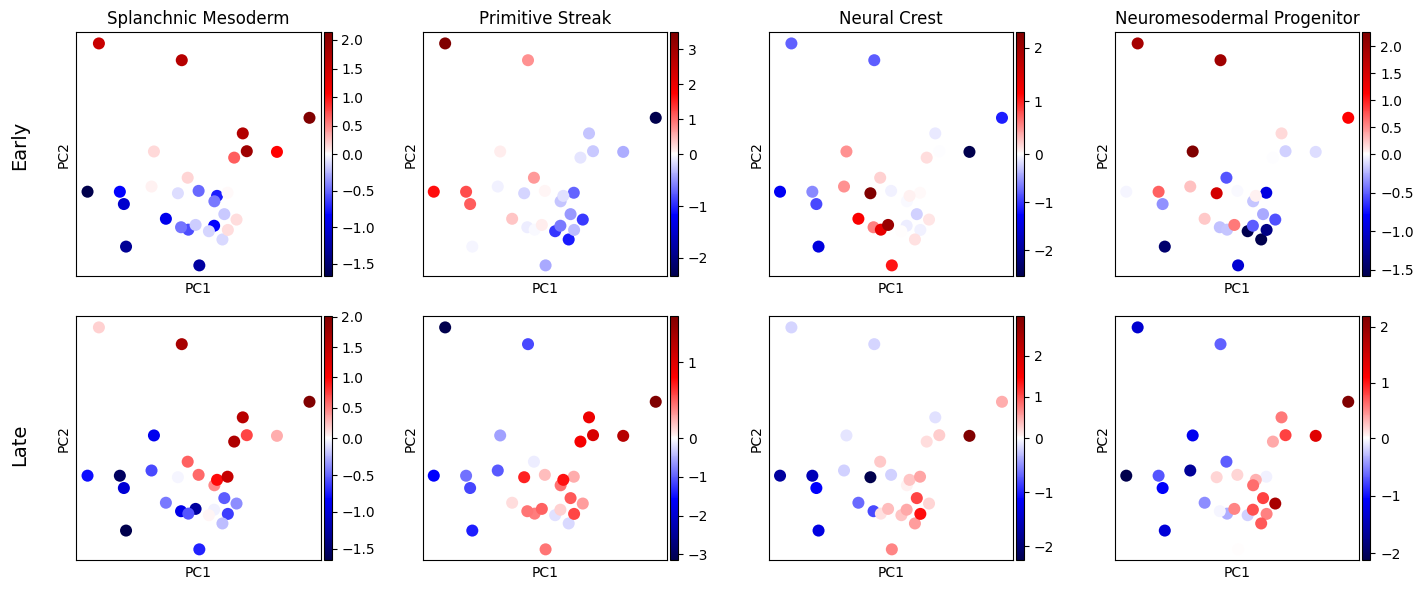

In [20]:
nrow = adata.var.stage.cat.categories.size
ncol = adata.var.GEO.cat.categories.size
fig, ax = plt.subplots(nrow, ncol, figsize = (14, 6))
for i, stage in enumerate(adata.var.stage.cat.categories):
    for j, dset in enumerate(adata.var.GEO.cat.categories):
        sc.pl.pca(adata, color = f'{dset}_{stage}', size = 300, vcenter = 0, cmap = 'seismic', ax = ax[i, j], show = False)
        if i == 0:
            ax[i, j].set_title(dset_labels[dset], size = 12)
        else:
            ax[i, j].set_title('')
        ax[i, j].set_box_aspect(1)
    fig.text(0, -(i - 1 - 1/nrow) / 2, stage.capitalize(), size = 14, rotation = 90, va = 'center', ha = 'center')
plt.tight_layout()
plt.show()